In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df= pd.read_csv('heart.csv')

# Exploratory Data Analysis

In [38]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [74]:
df.shape

(918, 21)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [40]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [41]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [42]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Data Preprocessing

In [43]:
categorical_cols = ['Sex','ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'] 
#import pandas as pd
df = pd.get_dummies(df, columns = categorical_cols)

In [44]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


# Model Building

In [45]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039,-0.055750,0.055750,0.166607,...,-0.011335,0.032042,0.145727,-0.230566,0.136798,-0.215793,0.215793,0.138397,0.185568,-0.258067
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589,-0.005133,0.005133,0.048824,...,-0.041348,0.049855,0.053166,-0.116851,0.090447,-0.155101,0.155101,-0.007912,0.099207,-0.096146
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741,0.200092,-0.200092,-0.120531,...,-0.006634,0.017365,0.177077,-0.038470,-0.133106,0.034166,-0.034166,-0.083371,-0.050953,0.094027
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291,-0.120076,0.120076,0.131176,...,-0.039249,0.026885,-0.011656,-0.093028,0.127110,-0.060451,0.060451,0.105102,0.107006,-0.161730
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421,0.189186,-0.189186,-0.354963,...,0.134580,0.100025,0.125793,0.023801,-0.157879,0.370425,-0.370425,-0.073316,-0.342581,0.383397
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951,-0.105734,0.105734,0.280026,...,-0.106212,0.032231,0.086794,-0.116719,0.055958,-0.408752,0.408752,0.322130,0.283295,-0.450577
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000,-0.305445,0.305445,0.516716,...,-0.212964,-0.054790,0.010670,-0.091580,0.102527,-0.494282,0.494282,0.122527,0.554134,-0.622164
Sex_F,-0.055750,-0.005133,0.200092,-0.120076,0.189186,-0.105734,-0.305445,1.000000,-1.000000,-0.183876,...,0.066486,0.004031,0.049518,0.010634,-0.063715,0.190664,-0.190664,-0.066036,-0.116077,0.150942
Sex_M,0.055750,0.005133,-0.200092,0.120076,-0.189186,0.105734,0.305445,-1.000000,1.000000,0.183876,...,-0.066486,-0.004031,-0.049518,-0.010634,0.063715,-0.190664,0.190664,0.066036,0.116077,-0.150942
ChestPainType_ASY,0.166607,0.048824,-0.120531,0.131176,-0.354963,0.280026,0.516716,-0.183876,0.183876,1.000000,...,-0.577670,-0.249003,0.002289,-0.063606,0.076438,-0.430034,0.430034,0.103407,0.303645,-0.359443


# Feature Selection

In [55]:
y = df.HeartDisease.copy()
X = df.drop(['HeartDisease'], axis=1)

In [56]:
y_new = y.values
X_new = X.values

## Univariate Selection

In [51]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

In [49]:
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X_new, y_new)

In [52]:
set_printoptions(precision=3)
print(fit.scores_)

[7.916e+01 1.073e+01 5.246e+01 7.048e+01 1.749e+02 1.786e+02 9.425e+01
 9.425e+01 3.337e+02 1.765e+02 4.352e+01 2.758e+00 1.043e-01 7.747e+00
 9.731e+00 2.961e+02 2.961e+02 1.396e+01 4.059e+02 5.785e+02]


In [54]:
features = fit.transform(X_new)
# summarize selected features
print(features[0:5,:])

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [0. 0. 0. 1.]]


## Recursive Feature Elimination

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [70]:
features = (X.columns)

In [61]:
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X_new, y_new)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Num Features: 5
Selected Features: [False False False  True False False False  True  True False False False
 False False False False  True False False  True]
Feature Ranking: [13 16 15  1 14  6  3  1  1  5  7  8 12 10  9  4  1 11  2  1]


In [72]:
features[fit.support_]

Index(['FastingBS', 'Sex_M', 'ChestPainType_ASY', 'ExerciseAngina_Y',
       'ST_Slope_Up'],
      dtype='object')

# Logistic Regression

In [73]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [76]:
model = LogisticRegression(max_iter=10**4)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [77]:
y_pred = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head(1000)

,True,Prediction
0,0,0
1,1,1
2,0,0
3,1,0
4,0,0
...,...,...
317,0,0
318,1,1
319,0,0
320,1,1


Accuracy: 0.8850931677018633
Precision: 0.9010416666666666
Recall: 0.9057591623036649
F1: 0.9033942558746737


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


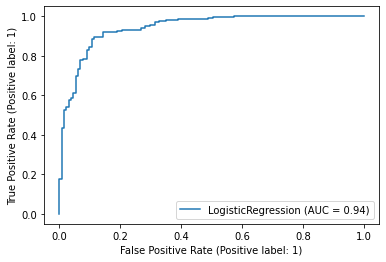

In [79]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))
metrics.plot_roc_curve(model,X_test,y_test)

In [80]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [81]:
cnf_matrix

array([[112,  19],
       [ 18, 173]])

Text(0.5, 15.0, 'Predicted')

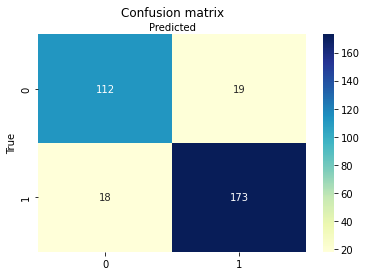

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0.0, 1.0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

## Decision Trees

In [104]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)

Accuracy: 0.8354037267080745
Precision: 0.8484848484848485
Recall: 0.8795811518324608
F1: 0.8637532133676092


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


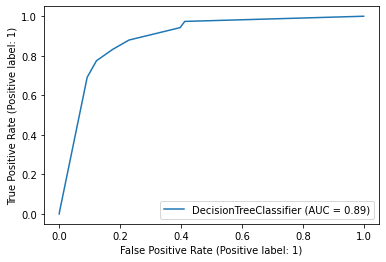

In [105]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_en))
print("Precision:", metrics.precision_score(y_test, y_pred_en))
print("Recall:", metrics.recall_score(y_test, y_pred_en))
print("F1:",metrics.f1_score(y_test, y_pred_en))
metrics.plot_roc_curve(clf_en,X_test,y_test)

In [106]:
metrics.confusion_matrix(y_test, y_pred_en)

array([[101,  30],
       [ 23, 168]])

Text(0.5, 15.0, 'Predicted')

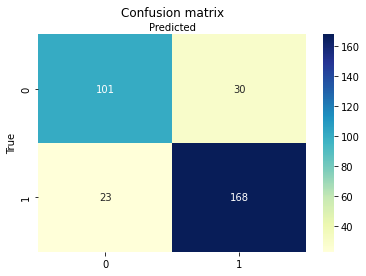

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_en)

labels = [0.0, 1.0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

## SVC

In [109]:
from sklearn import svm

In [150]:
clf = svm.SVC(kernel='linear',degree =2)
clf = clf.fit(X_train, y_train)

In [151]:
predictions = clf.predict(X_test)

Accuracy: 0.8913043478260869
Precision: 0.9105263157894737
Recall: 0.9057591623036649
F1: 0.9081364829396327


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


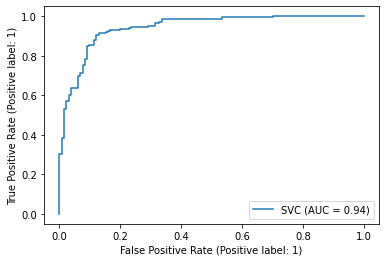

In [152]:
print("Accuracy:", metrics.accuracy_score(y_test, predictions))
print("Precision:", metrics.precision_score(y_test, predictions))
print("Recall:", metrics.recall_score(y_test, predictions))
print("F1:",metrics.f1_score(y_test, predictions))
metrics.plot_roc_curve(clf,X_test,y_test)

In [153]:
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[114,  17],
       [ 18, 173]])

Text(0.5, 15.0, 'Predicted')

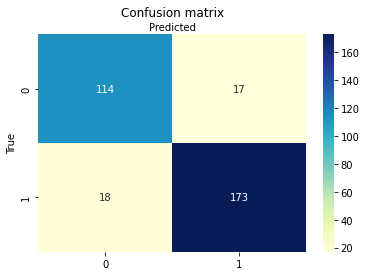

In [154]:
cnf_matrix = metrics.confusion_matrix(y_test, predictions)

labels = [0.0, 1.0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

## LSTM

In [176]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [178]:
len(X_train.columns)

20

In [179]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, LSTM
import tensorflow as tf

In [180]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [202]:
model = Sequential()
#model.add(Dense(128, activation='relu', input_shape=[16,]))
model.add(LSTM(20,input_shape=([20,1]),activation='tanh',recurrent_activation='sigmoid'))
model.add(Dense(128, activation='relu', input_shape=[20,]))
#model.add(LSTM(8,activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(2, activation='relu'))
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [203]:
model.fit(x=scaled_X_train, y=y_train, epochs=5, validation_data=(scaled_X_test, y_test))

Epoch 1/5
19/19 [==============================] - 4s 40ms/step - loss: 0.6931 - accuracy: 0.4329 - val_loss: 0.6931 - val_accuracy: 0.4720
Epoch 2/5
19/19 [==============================] - 0s 11ms/step - loss: 0.6931 - accuracy: 0.4329 - val_loss: 0.6931 - val_accuracy: 0.4720
Epoch 3/5
19/19 [==============================] - 0s 12ms/step - loss: 0.6931 - accuracy: 0.4329 - val_loss: 0.6931 - val_accuracy: 0.4720
Epoch 4/5
19/19 [==============================] - 0s 11ms/step - loss: 0.6931 - accuracy: 0.4329 - val_loss: 0.6931 - val_accuracy: 0.4720
Epoch 5/5
19/19 [==============================] - 0s 11ms/step - loss: 0.6931 - accuracy: 0.4329 - val_loss: 0.6931 - val_accuracy: 0.4720


In [204]:
model.evaluate(scaled_X_test, y_test, verbose=1)
y_pred=model.predict(scaled_X_test, verbose=1)
y_pred_inv = encoder.inverse_transform(y_pred)

11/11 [==============================] - 0s 3ms/step


In [205]:
y_pred_inv

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Text(0.5, 15.0, 'Predicted')

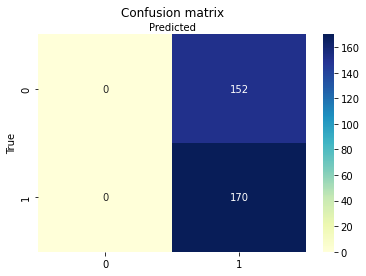

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_inv)

labels = [0.0, 1.0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

## NN Binary Classifier

In [225]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=20))
model.add(Dense(128, activation='relu', input_dim=20))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X, y, epochs=100, batch_size=20, validation_split=0.2)

Epoch 1/100
37/37 [==============================] - 1s 14ms/step - loss: 2.2420 - accuracy: 0.5940 - val_loss: 0.6687 - val_accuracy: 0.7228
Epoch 2/100
37/37 [==============================] - 0s 5ms/step - loss: 0.6309 - accuracy: 0.7275 - val_loss: 0.5267 - val_accuracy: 0.7120
Epoch 3/100
37/37 [==============================] - 0s 5ms/step - loss: 0.7500 - accuracy: 0.6866 - val_loss: 0.8542 - val_accuracy: 0.6685
Epoch 4/100
37/37 [==============================] - 0s 4ms/step - loss: 0.5120 - accuracy: 0.7698 - val_loss: 0.8154 - val_accuracy: 0.5978
Epoch 5/100
37/37 [==============================] - 0s 4ms/step - loss: 0.8063 - accuracy: 0.6894 - val_loss: 0.6340 - val_accuracy: 0.7283
Epoch 6/100
37/37 [==============================] - 0s 5ms/step - loss: 0.4556 - accuracy: 0.8202 - val_loss: 0.5872 - val_accuracy: 0.7391
Epoch 7/100
37/37 [==============================] - 0s 4ms/step - loss: 0.4171 - accuracy: 0.8188 - val_loss: 0.4395 - val_accuracy: 0.7880
Epoch 8/100


In [226]:
y_pred = (model.predict(X_test) > 0.5).astype('int32')

In [227]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8571428571428571
Precision: 0.8522727272727273
Recall: 0.8823529411764706
F1: 0.8670520231213872


In [228]:
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[ 64,  88],
       [ 68, 102]])

Text(0.5, 15.0, 'Predicted')

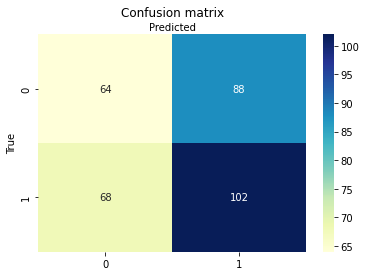

In [229]:
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
labels = [0.0, 1.0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')